### Load Initial Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load Dataset

In [2]:
dataset = pd.read_csv("/kaggle/input/applicant-details-for-loan-approve/Applicant-details.csv")
dataset.head()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


### General Information

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Applicant_ID                 100000 non-null  int64 
 1   Annual_Income                100000 non-null  int64 
 2   Applicant_Age                100000 non-null  int64 
 3   Work_Experience              100000 non-null  int64 
 4   Marital_Status               100000 non-null  object
 5   House_Ownership              100000 non-null  object
 6   Vehicle_Ownership(car)       100000 non-null  object
 7   Occupation                   100000 non-null  object
 8   Residence_City               100000 non-null  object
 9   Residence_State              100000 non-null  object
 10  Years_in_Current_Employment  100000 non-null  int64 
 11  Years_in_Current_Residence   100000 non-null  int64 
 12  Loan_Default_Risk            100000 non-null  int64 
dtypes: int64(7), ob

### Statistical Information

In [4]:
dataset.describe()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,5.001617e+06,49.995400,10.110750,6.342990,11.996020,0.129970
std,28867.657797,2.876394e+06,17.056051,5.996007,3.644942,1.396826,0.336272
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,25000.750000,2.507092e+06,35.000000,5.000000,4.000000,11.000000,0.000000
50%,50000.500000,5.004938e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,75000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,100000.000000,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


### Check Missing Status of Each Features

In [5]:
nan = [(clm_names, "{} %".format(np.round(dataset[clm_names].isna().sum() * 100/len(dataset), 2))) for clm_names in dataset]
nan = pd.DataFrame(nan, columns = ['features', 'missing value percentage'])
nan

,features,missing value percentage
0,Applicant_ID,0.0 %
1,Annual_Income,0.0 %
2,Applicant_Age,0.0 %
3,Work_Experience,0.0 %
4,Marital_Status,0.0 %
5,House_Ownership,0.0 %
6,Vehicle_Ownership(car),0.0 %
7,Occupation,0.0 %
8,Residence_City,0.0 %
9,Residence_State,0.0 %


### Check Duplicate

In [6]:
dataset.duplicated().sum()

0

### Data Visualization

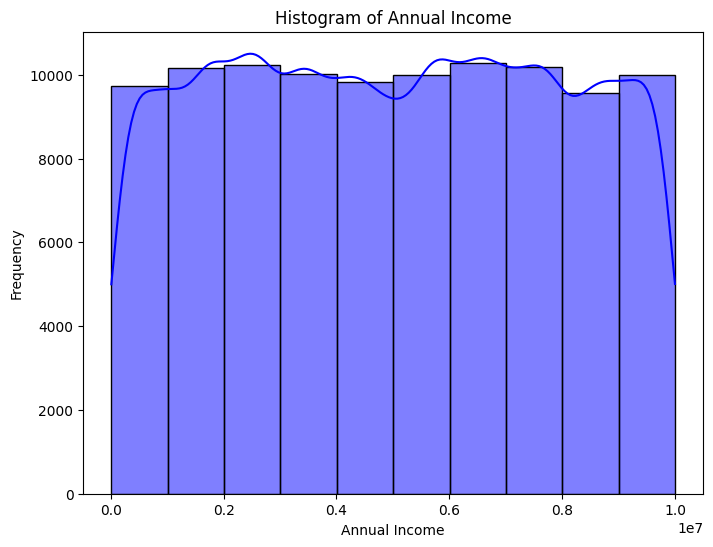

In [7]:
# histogram of annual income
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Annual_Income'], bins=10, kde=True, color='blue')
plt.title('Histogram of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

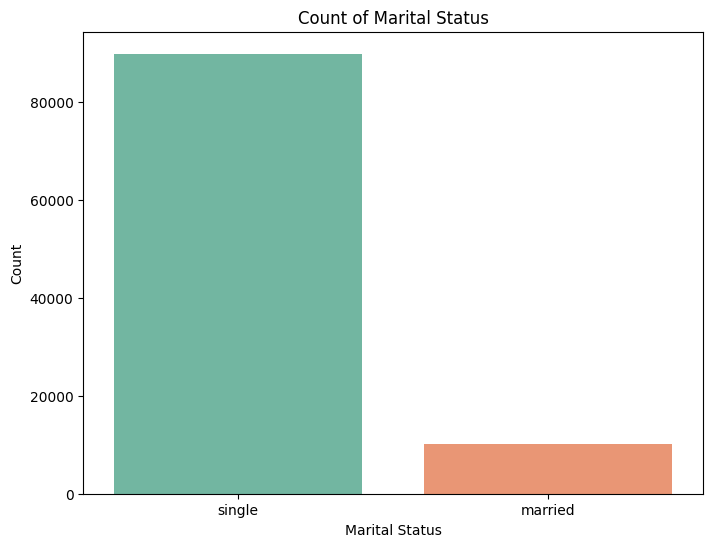

In [8]:
# bar plot of marital status
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Marital_Status', palette='Set2')
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

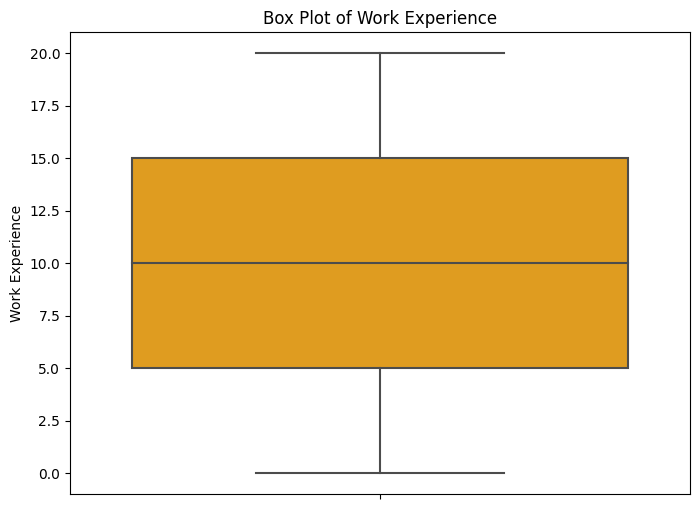

In [9]:
# Box plot of Work Experience
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, y='Work_Experience', color='orange')
plt.title('Box Plot of Work Experience')
plt.ylabel('Work Experience')
plt.show()

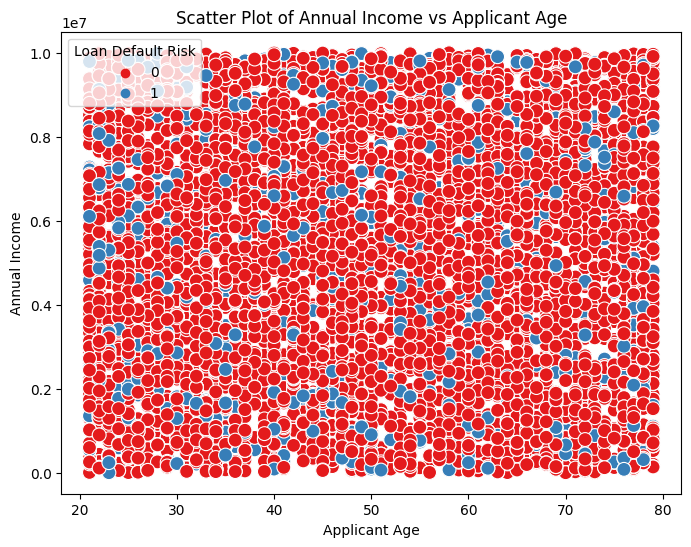

In [10]:
# Scatter plot of Annual Income vs Applicant Age
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='Applicant_Age', y='Annual_Income', hue='Loan_Default_Risk', palette='Set1', s=100)
plt.title('Scatter Plot of Annual Income vs Applicant Age')
plt.xlabel('Applicant Age')
plt.ylabel('Annual Income')
plt.legend(title='Loan Default Risk', loc='upper left')
plt.show()

### Features Segregation

In [11]:
X = dataset.drop(columns=['Loan_Default_Risk', 'Applicant_ID'])  
y = dataset['Loan_Default_Risk']  

### Categorical Management

In [12]:
print("Number of Unique Categories in Features")
print(dataset.Marital_Status.nunique())
print(dataset.House_Ownership.nunique())
print(dataset["Vehicle_Ownership(car)"].nunique())


print(dataset.Occupation.nunique())
print(dataset.Residence_City.nunique())
print(dataset.Residence_State.nunique())

Number of Unique Categories in Features
2
3
2
51
317
29


In [13]:
# Low Cardinality Features
# Label encoding for Marital_Status
X['Marital_Status'] = X['Marital_Status'].map({'single': 0, 'married': 1})

# One-hot encoding for House_Ownership
house_ownership_dummies = pd.get_dummies(X['House_Ownership'], prefix='House_Ownership').astype(int)
X = pd.concat([X, house_ownership_dummies], axis=1)
X.drop('House_Ownership', axis=1, inplace=True)

# Label encoding for Vehicle_Ownership(car)
X['Vehicle_Ownership(car)'] = X['Vehicle_Ownership(car)'].map({'no': 0, 'yes': 1})


In [14]:
X.head()

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,9657655,76,0,0,0,Psychologist,Jalandhar,Punjab,0,12,0,0,1
1,9259353,37,18,0,0,Petroleum_Engineer,Bally,West_Bengal,12,11,0,0,1
2,1509721,66,8,0,0,Drafter,Indore,Madhya_Pradesh,4,12,0,0,1
3,5867312,43,1,0,0,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,0,1,0
4,7223191,44,9,0,0,Air_traffic_controller,Asansol,West_Bengal,9,13,0,0,1


In [15]:
# Medium Cardinality Features
from sklearn.model_selection import KFold

X['Loan_Default_Risk'] = y
# Create a function for target encoding using KFold
def target_encode(df, target_col, cat_col, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    df[f'{cat_col}_enc'] = 0
    
    for train_idx, test_idx in kf.split(df):
        train_fold, test_fold = df.iloc[train_idx], df.iloc[test_idx]
        mean_target = train_fold.groupby(cat_col)[target_col].mean()
        df.loc[test_fold.index, f'{cat_col}_enc'] = test_fold[cat_col].map(mean_target)
    
    return df[f'{cat_col}_enc']

# Target encoding for Residence_State and Occupation
X['Residence_State_enc'] = target_encode(X, 'Loan_Default_Risk', 'Residence_State')
X['Occupation_enc'] = target_encode(X, 'Loan_Default_Risk', 'Occupation')

X.drop(columns=['Residence_State', 'Occupation', 'Loan_Default_Risk'], inplace=True)


In [16]:
X.head()

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,Vehicle_Ownership(car),Residence_City,Years_in_Current_Employment,Years_in_Current_Residence,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Residence_State_enc,Occupation_enc
0,9657655,76,0,0,0,Jalandhar,0,12,0,0,1,0.090418,0.124432
1,9259353,37,18,0,0,Bally,12,11,0,0,1,0.138437,0.076923
2,1509721,66,8,0,0,Indore,4,12,0,0,1,0.170370,0.121265
3,5867312,43,1,0,0,Kurnool[18],1,13,0,1,0,0.117867,0.165843
4,7223191,44,9,0,0,Asansol,9,13,0,0,1,0.137303,0.153801


In [17]:
# High Cardinality Features 
from category_encoders import HashingEncoder

he = HashingEncoder(cols=['Residence_City'], n_components=10)  # Number of components can be adjusted
X_hashed = he.fit_transform(X)
X = X_hashed

### Train/Test Split

In [18]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (80000, 22)
Shape of X_test: (20000, 22)
Shape of y_train: (80000,)
Shape of y_test: (20000,)


In [19]:
# ML Model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
# Accuracy Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9235
Precision: 0.6956022944550669
Recall: 0.7124951037994516
F1 Score: 0.7039473684210527
ROC AUC Score: 0.8334356071527778
Confusion Matrix:
 [[16651   796]
 [  734  1819]]


In [21]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model
best_y_pred = best_model.predict(X_test)

# Calculate metrics
best_accuracy = accuracy_score(y_test, best_y_pred)
best_precision = precision_score(y_test, best_y_pred)
best_recall = recall_score(y_test, best_y_pred)
best_f1 = f1_score(y_test, best_y_pred)
best_roc_auc = roc_auc_score(y_test, best_y_pred)
best_cm = confusion_matrix(y_test, best_y_pred)

print("Best Model Accuracy:", best_accuracy)
print("Best Model Precision:", best_precision)
print("Best Model Recall:", best_recall)
print("Best Model F1 Score:", best_f1)
print("Best Model ROC AUC Score:", best_roc_auc)
print("Best Model Confusion Matrix:\n", best_cm)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Model Accuracy: 0.9248
Best Model Precision: 0.7018083878414775
Best Model Recall: 0.7144535840188014
Best Model F1 Score: 0.7080745341614907
Best Model ROC AUC Score: 0.8350166699253748
Best Model Confusion Matrix:
 [[16672   775]
 [  729  1824]]


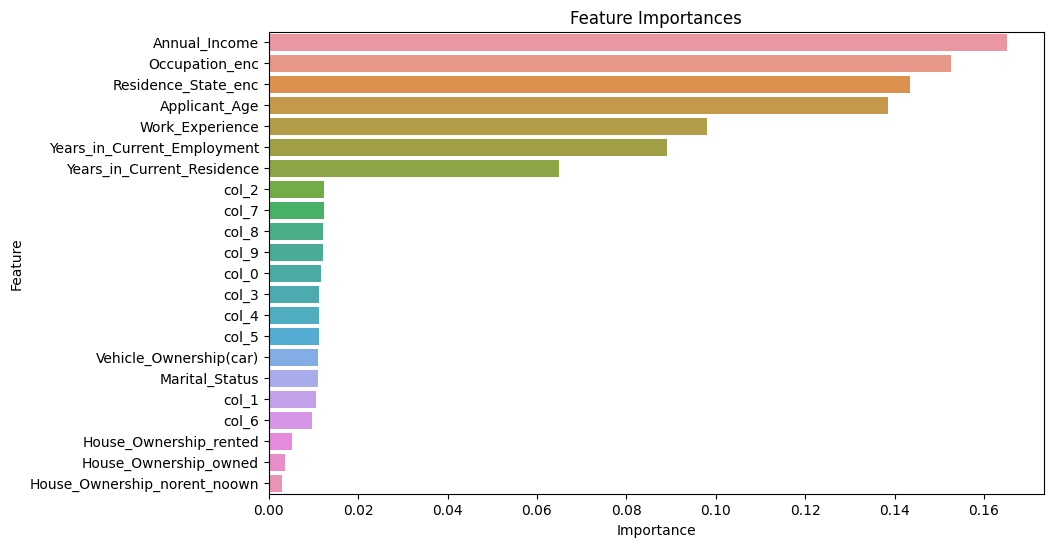

In [22]:
# Model INterpretation
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance
feature_importances = best_model.feature_importances_
features = X.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


In [23]:
# End!
# Thanks!